# Read MODIS Terra/Aqua netcdf as xarray
- HDF4 MODIS was converted to netCDF using nccopy 

In [1]:
import xarray as xr
import s3fs
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps

xr.set_options(display_style='html')
%matplotlib inline

## Connect to bucket (anonymous login for public data only)

In [2]:
fs = s3fs.S3FileSystem(anon=True,
      client_kwargs={
         'endpoint_url': 'https://forces2021.uiogeo-apps.sigma2.no/'
      })

In [9]:
remote_files = fs.ls('data/MODIS/MODIS-SUB-XYD')

In [10]:
remote_files[:10]

['data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000032.061.2017276183309.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000061.061.2017272215822.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000092.061.2017276174940.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000122.061.2017275191641.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000153.061.2017276072839.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000183.061.2017276075622.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000214.061.2017276050502.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000245.061.2017276075932.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000275.061.2017276173030.nc',
 'data/MODIS/MODIS-SUB-XYD/MOD08_M3.A2000306.061.2017276190346.nc']

In [12]:
# Iterate through remote_files to create a fileset
fileset = [fs.open(file) for file in remote_files]

## Create time index from filename to concatenate netCDF files along time dimension

In [11]:
def paths_to_datetimeindex(paths):
    return  [datetime.strptime(date.split('.A')[-1].split('.')[0], '%Y%j') for date in paths]

In [13]:
# Create variable used for time axis
time_var = xr.Variable('time', paths_to_datetimeindex(remote_files))

In [14]:
time_var

<xarray.Variable (time: 260)>
array(['2000-02-01T00:00:00.000000000', '2000-03-01T00:00:00.000000000',
       '2000-04-01T00:00:00.000000000', '2000-05-01T00:00:00.000000000',
       '2000-06-01T00:00:00.000000000', '2000-07-01T00:00:00.000000000',
       '2000-08-01T00:00:00.000000000', '2000-09-01T00:00:00.000000000',
       '2000-10-01T00:00:00.000000000', '2000-11-01T00:00:00.000000000',
       '2000-12-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2001-02-01T00:00:00.000000000', '2001-03-01T00:00:00.000000000',
       '2001-04-01T00:00:00.000000000', '2001-05-01T00:00:00.000000000',
       '2001-06-01T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
       '2001-08-01T00:00:00.000000000', '2001-09-01T00:00:00.000000000',
       '2001-10-01T00:00:00.000000000', '2001-11-01T00:00:00.000000000',
       '2001-12-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2002-02-01T00:00:00.000000000', '2002-03-01T00:00:00.000000000',
       '2002-04-01T00:00:00.000000000', '2002-05-01T00:00:00.000000000',
       '2002-06-01T00:00:00.000000000', '2002-07-01T00:00:00.000000000',
       '2002-08-01T00:00:00.000000000', '2002-09-01T00:00:00.000000000',
       '2002-10-01T00:00:00.000000000', '2002-11-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2003-02-01T00:00:00.000000000', '2003-03-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2003-05-01T00:00:00.000000000',
...
       '2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

## Concatenate all files

In [16]:
# Load in and concatenate all individual GeoTIFFs
dset = xr.concat([xr.open_mfdataset([i],) for i in fileset],
                        dim=time_var)

In [17]:
dset = dset.rename_dims({'YDim:mod08': 'latitude', 'XDim:mod08':'longitude', 'Effective_Optical_Depth_Average_Ocean_Micron_Levels:mod08':'levels'})

In [18]:
dset = dset.rename_vars({'YDim':'latitude', 'XDim':'longitude', 'Effective_Optical_Depth_Average_Ocean_Micron_Levels': 'levels'})

In [19]:
x = dset.isel(time=0).longitude.squeeze().reset_coords(drop=True)
y = dset.isel(time=0).latitude.squeeze().reset_coords(drop=True)
z = dset.isel(time=0).levels.squeeze().reset_coords(drop=True)

In [20]:
dset = dset.assign_coords({"longitude": x, "latitude": y, 'levels': z})

In [21]:
dset

<xarray.Dataset>
Dimensions:                                           (latitude: 180, levels: 7, longitude: 360, time: 260)
Coordinates:
  * levels                                            (levels) float32 0.47 ....
  * longitude                                         (longitude) float32 -17...
  * latitude                                          (latitude) float32 89.5...
  * time                                              (time) datetime64[ns] 2...
Data variables:
    Aerosol_Optical_Depth_Land_Ocean_Mean_Mean        (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean  (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Aerosol_Optical_Depth_Average_Ocean_Mean_Mean     (time, levels, latitude, longitude) float32 dask.array<chunksize=(1, 7, 180, 360), meta=np.ndarray>
    Cloud_Top_Temperature_Mean_Mean                   (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Effective_Emissivity_Mean_Mean              (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Fraction_Mean_Mean                          (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Optical_Thickness_Liquid_Mean_Mean          (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Effective_Radius_Liquid_Mean_Mean           (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Mean_Mean                 (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Cloud_Water_Path_Ice_Mean_Mean                    (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    StructMetadata.1:                  Min"\n\t\t\t\tDataType=DFNT_INT16\n\t\...
    StructMetadata.2:                  BJECT=DataField_295\n\t\t\tOBJECT=Data...
    StructMetadata.3:                  NT16\n\t\t\t\tDimList=("YDim","XDim")\...
    StructMetadata.4:                  \t\tDataFieldName="Cloud_Retrieval_Fra...
    StructMetadata.5:                  List=("YDim","XDim")\n\t\t\tEND_OBJECT...
    StructMetadata.6:                  CT=DataField_1037\n\t\t\t\tDataFieldNa...
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...
    identifier_product_doi:            10.5067/MODIS/MOD08_M3.061
    identifier_product_doi_authority:  http://dx.doi.org

## Visualize one single date

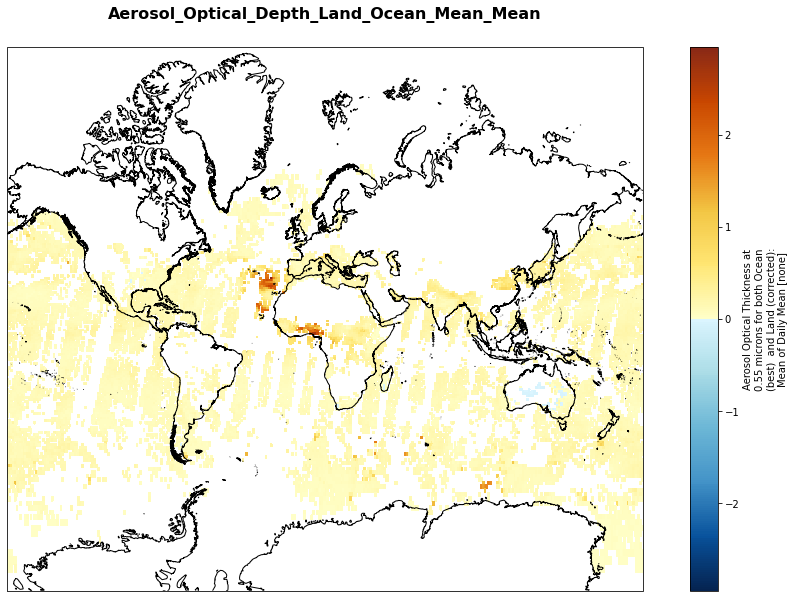

In [24]:
fig=plt.figure(figsize=(17,10))
# Define the projection
crs=ccrs.PlateCarree()

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=12.0))
ax.coastlines(resolution='10m')

# We need to project our data to the new Mercator projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
# we only plot values greather than 0 
dset['Aerosol_Optical_Depth_Land_Ocean_Mean_Mean'].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmaps.BlueYellowRed)
# Title for plot
plt.title('Aerosol_Optical_Depth_Land_Ocean_Mean_Mean\n',fontsize = 16, fontweight = 'bold', pad=10)
plt.savefig('Aerosol_Optical_Depth_Land_Ocean_Mean_Mean.png')

## Save results into local netCDF file

In [25]:
dset.to_netcdf('MOD08_M3_20000201-20210901.nc')

## Upload file to remote

In [28]:
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://forces2021.uiogeo-apps.sigma2.no/'
      })

In [29]:
s3_path =  "s3://data/MODIS/MOD08_M3_SUB_20000201-20210901.nc"
print(s3_path)

s3://data/MODIS/MOD08_M3_SUB_20000201-20210901.nc


In [30]:
fsg.put('MOD08_M3_20000201-20210901.nc', s3_path)